In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index=pd.read_csv('economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
##Drop unnecessary columns
df_index.drop(columns=["Unnamed: 0", "year","month"],axis=1,inplace=True)


In [8]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

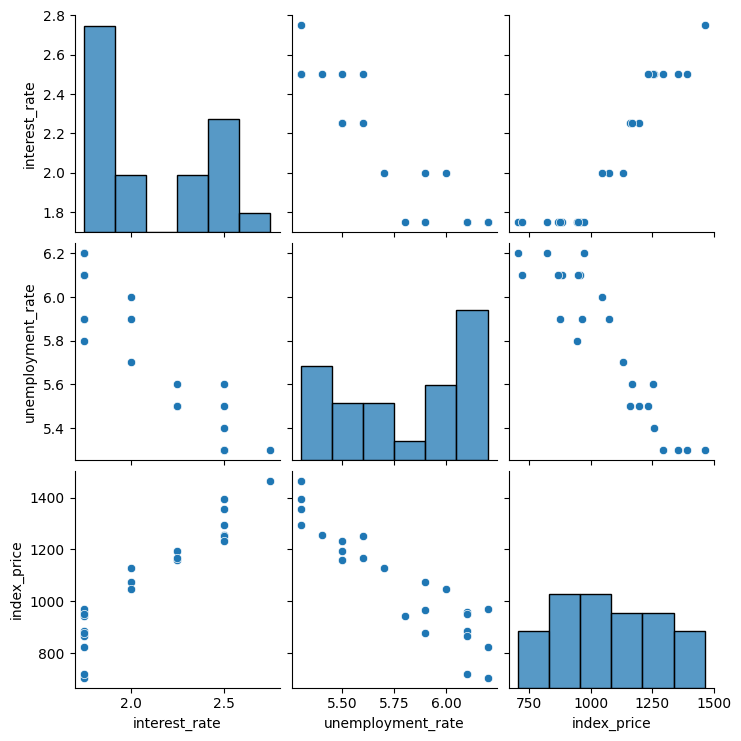

In [10]:
## Visualisation
import seaborn as sns
sns.pairplot(df_index)

In [11]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

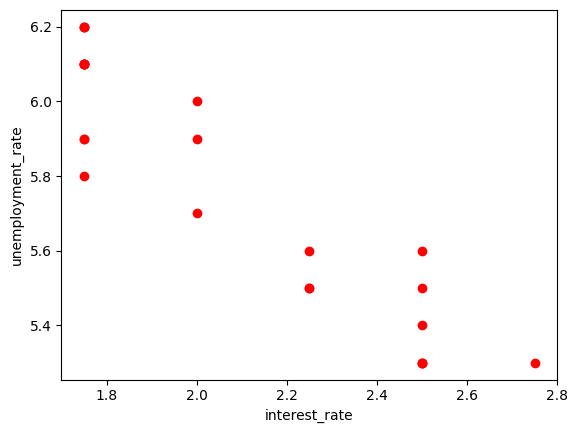

In [13]:
## Visualise the data point more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [14]:
##Independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [17]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [18]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
import seaborn as sns

In [24]:
sns.regplot(df_index['index_price'],df_index['unemployment_rate'])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [25]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [27]:
X_train

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2


In [28]:
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [39]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)


In [40]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [41]:
##Cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [42]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [43]:
np.mean(validation_score)

np.float64(-5914.82818016241)

In [45]:
##Prediction
y_pred=regression.predict(X_test)

c:\Users\subha\OneDrive\Desktop\vspython\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


2392157.381131736
1481.67998660565
1546.660072909279


In [48]:

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

-70.0584009287206


In [49]:
## Display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

-117.43066821453435


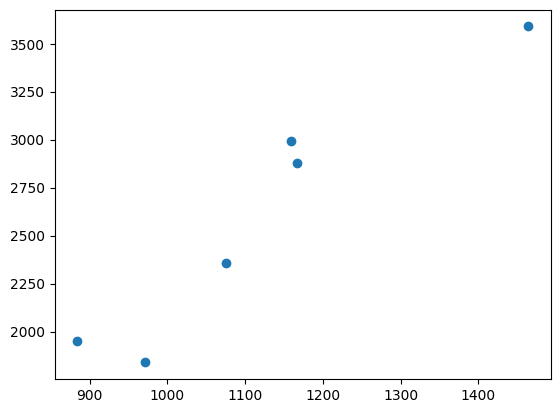

In [50]:
##Assumptions
plt.scatter(y_test,y_pred)

In [51]:
residuals=y_test-y_pred
print(residuals)

8    -1832.663609
16    -867.675376
0    -2125.725129
18   -1065.660719
11   -1284.676821
9    -1713.678266
Name: index_price, dtype: float64


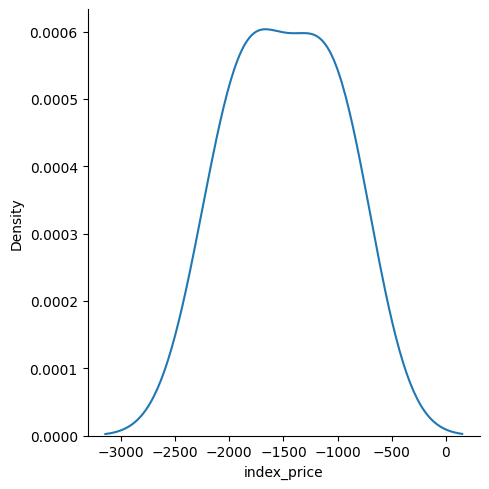

In [52]:
##plot the residuals
sns.displot(residuals,kind='kde')

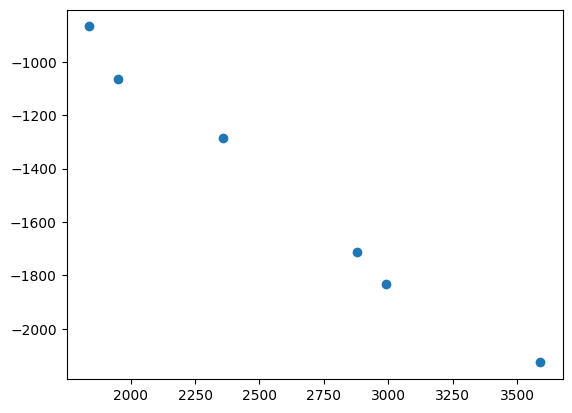

In [53]:
##scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [54]:
import statsmodels.api as sm 

In [55]:
## OLS linear regression
model=sm.OLS(y_train,X_train).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Fri, 05 Dec 2025   Prob (F-statistic):                    7.46e-19
Time:                        19:19:17   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
interest_rate       569.9494     44.349     12.851      0.000     475.933     663.965
unemployment_rate   -20.5734     15.966     -1.289      0.216     -54.421      13.274
==============================================================================
Omnibus:                        1.657   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                1.346
Skew:                          -0.611   Prob(JB):                        0.510
Kurtosis:                       2.451   Cond. No.                         14.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
print(regression.coef_)

[ 260.33709119 -360.58377051]
